In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/titanic - titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Embarked'] = df['Embarked'].fillna(0)

In [7]:
mean_age = df['Age'].mean()
df['Age']=df['Age'].fillna(mean_age)

In [8]:
df['Age'] = df['Age'].astype('int64')

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
def create_feat_has_cabin(df, colname):
    return df[colname].notnull().astype(int)

df['NewCabin'] = create_feat_has_cabin(df, 'Cabin')

In [11]:
df.drop(columns=['Cabin'], inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
NewCabin       0
dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

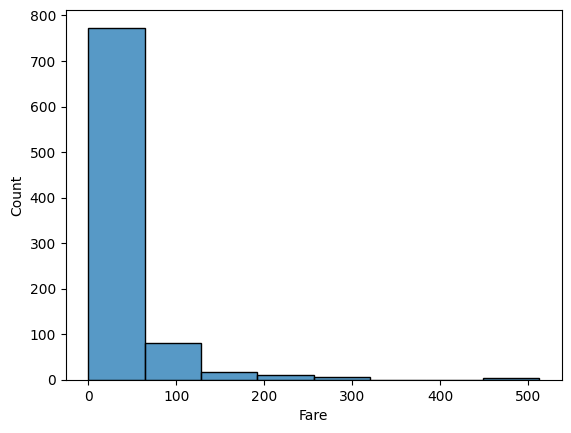

In [13]:
sns.histplot(data=df,x='Fare',bins=8)

<Axes: xlabel='Fare', ylabel='Count'>

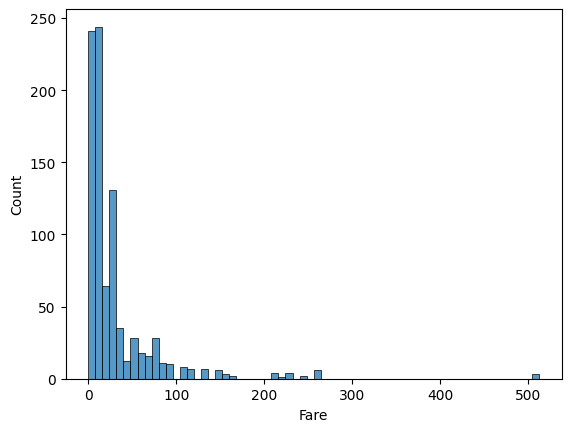

In [14]:
sns.histplot(data=df,x='Fare',binwidth=8)

<Axes: xlabel='Age', ylabel='Fare'>

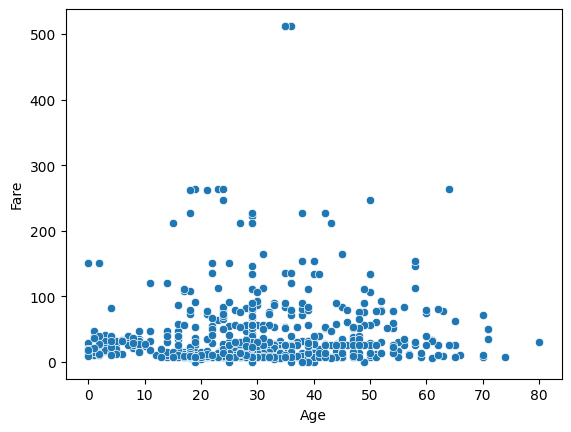

In [16]:
sns.scatterplot(x='Age',y='Fare',data=df)

<Axes: xlabel='Age', ylabel='Fare'>

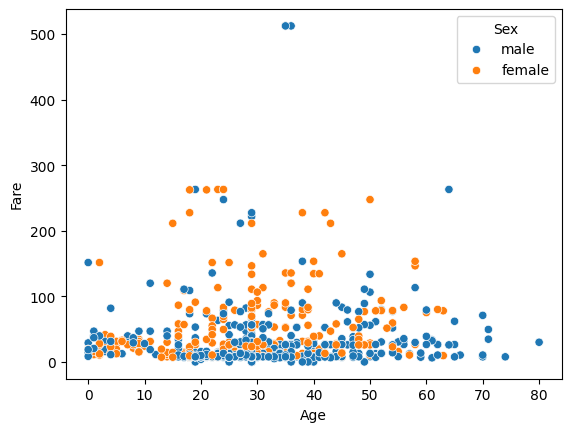

In [17]:
sns.scatterplot(x='Age',y='Fare',hue = 'Sex',data=df)

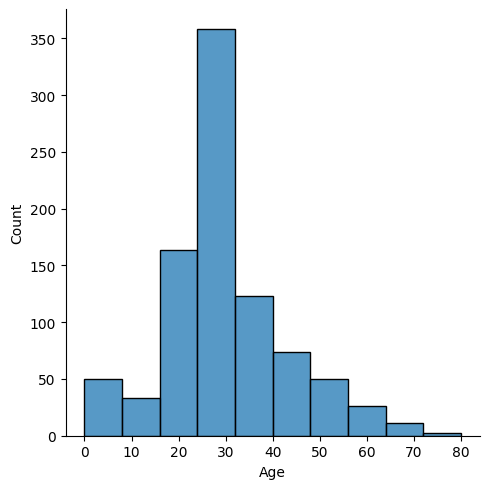

In [19]:
sns.displot(df, x='Age',bins=10)

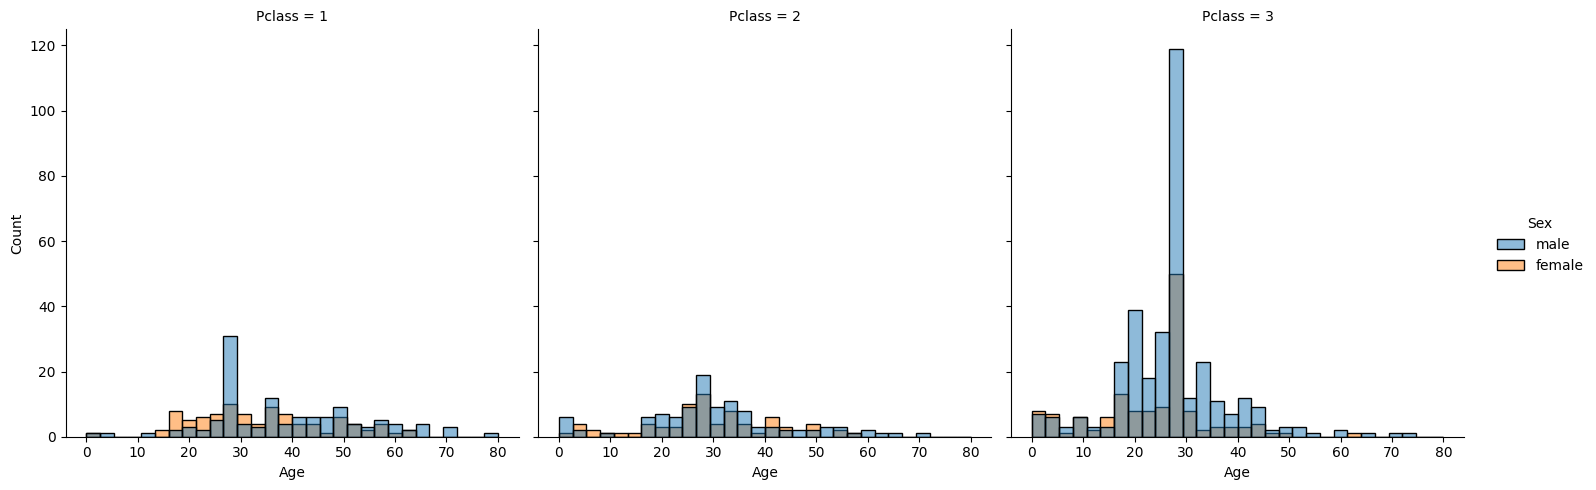

In [20]:
sns.displot(df, x='Age',hue='Sex', col='Pclass')

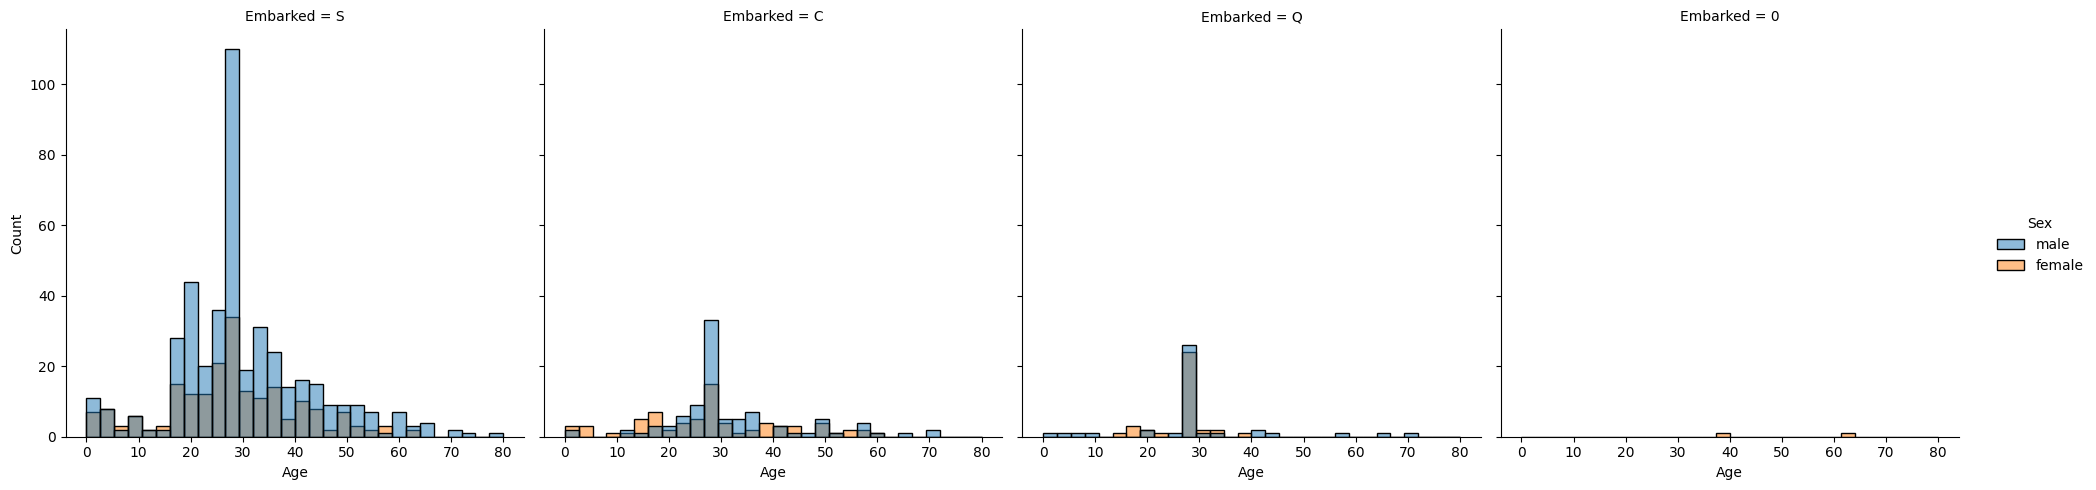

In [21]:
sns.displot(df, x='Age',hue='Sex', col='Embarked')

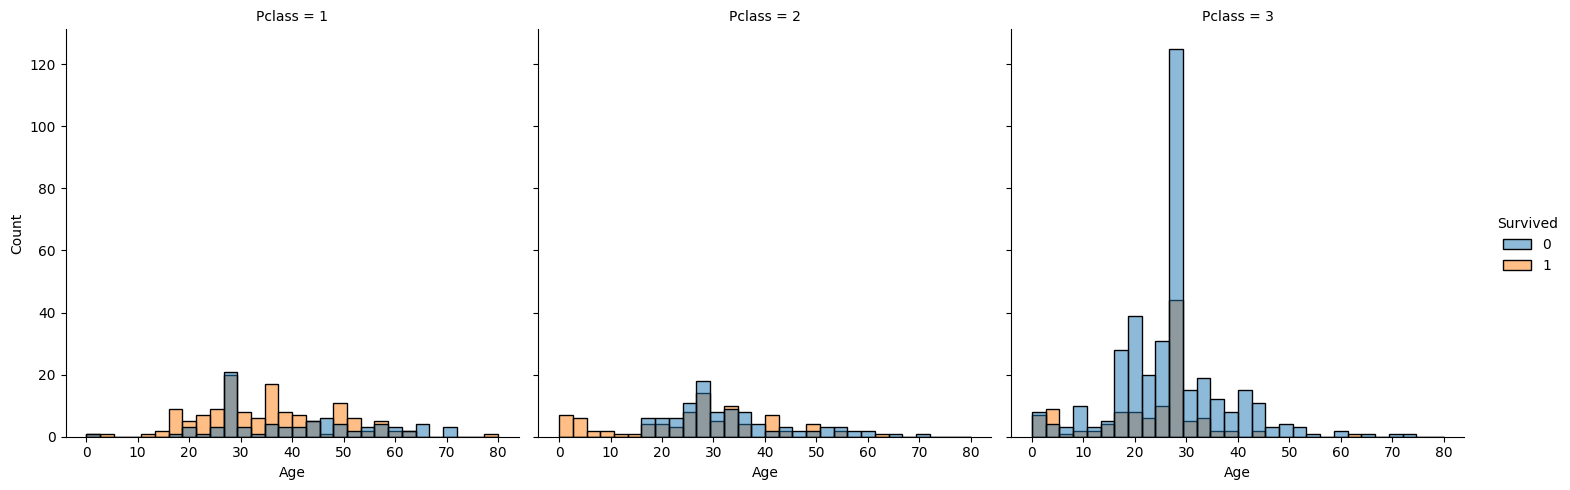

In [22]:
sns.displot(df, x='Age',hue='Survived', col='Pclass')

<Axes: xlabel='Sex', ylabel='Age'>

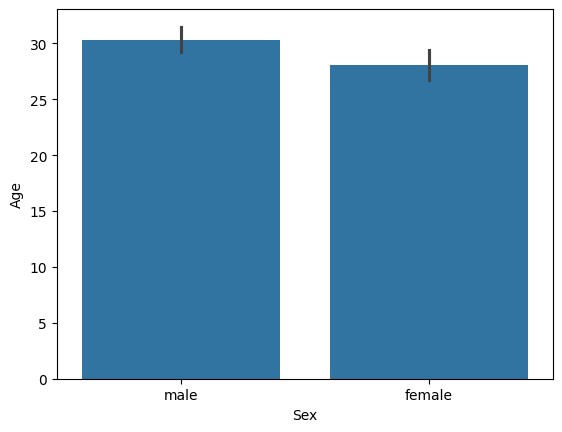

In [23]:
sns.barplot(data=df, x='Sex', y='Age')

C:\Users\HP\AppData\Local\Temp\ipykernel_19124\3099289092.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Fare', ci = None, hue='Sex')


<Axes: xlabel='Pclass', ylabel='Fare'>

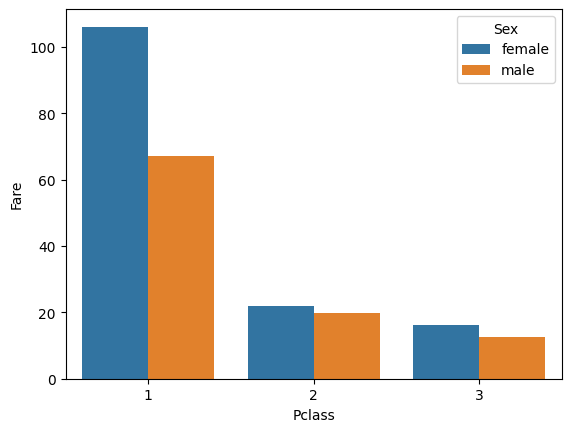

In [26]:
sns.barplot(data=df, x='Pclass', y='Fare', ci = None, hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

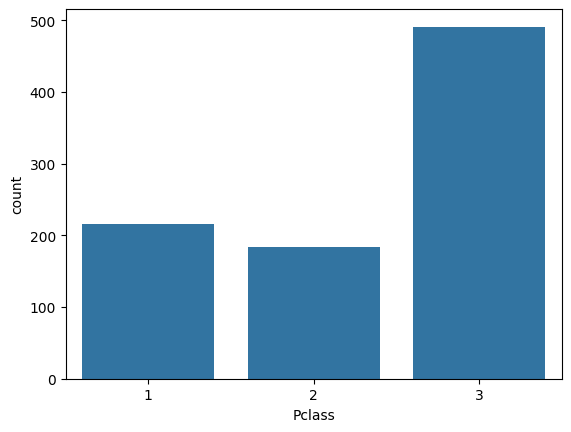

In [27]:
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

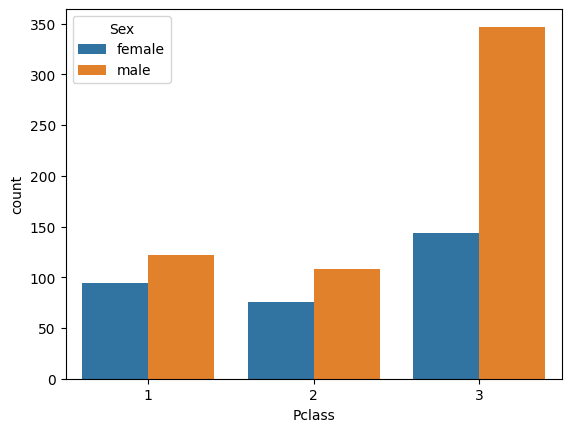

In [28]:
sns.countplot(x='Pclass', data=df, hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

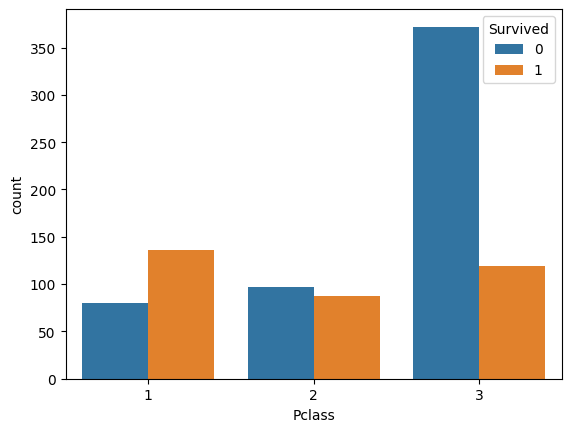

In [29]:
sns.countplot(x='Pclass', data=df, hue='Survived')

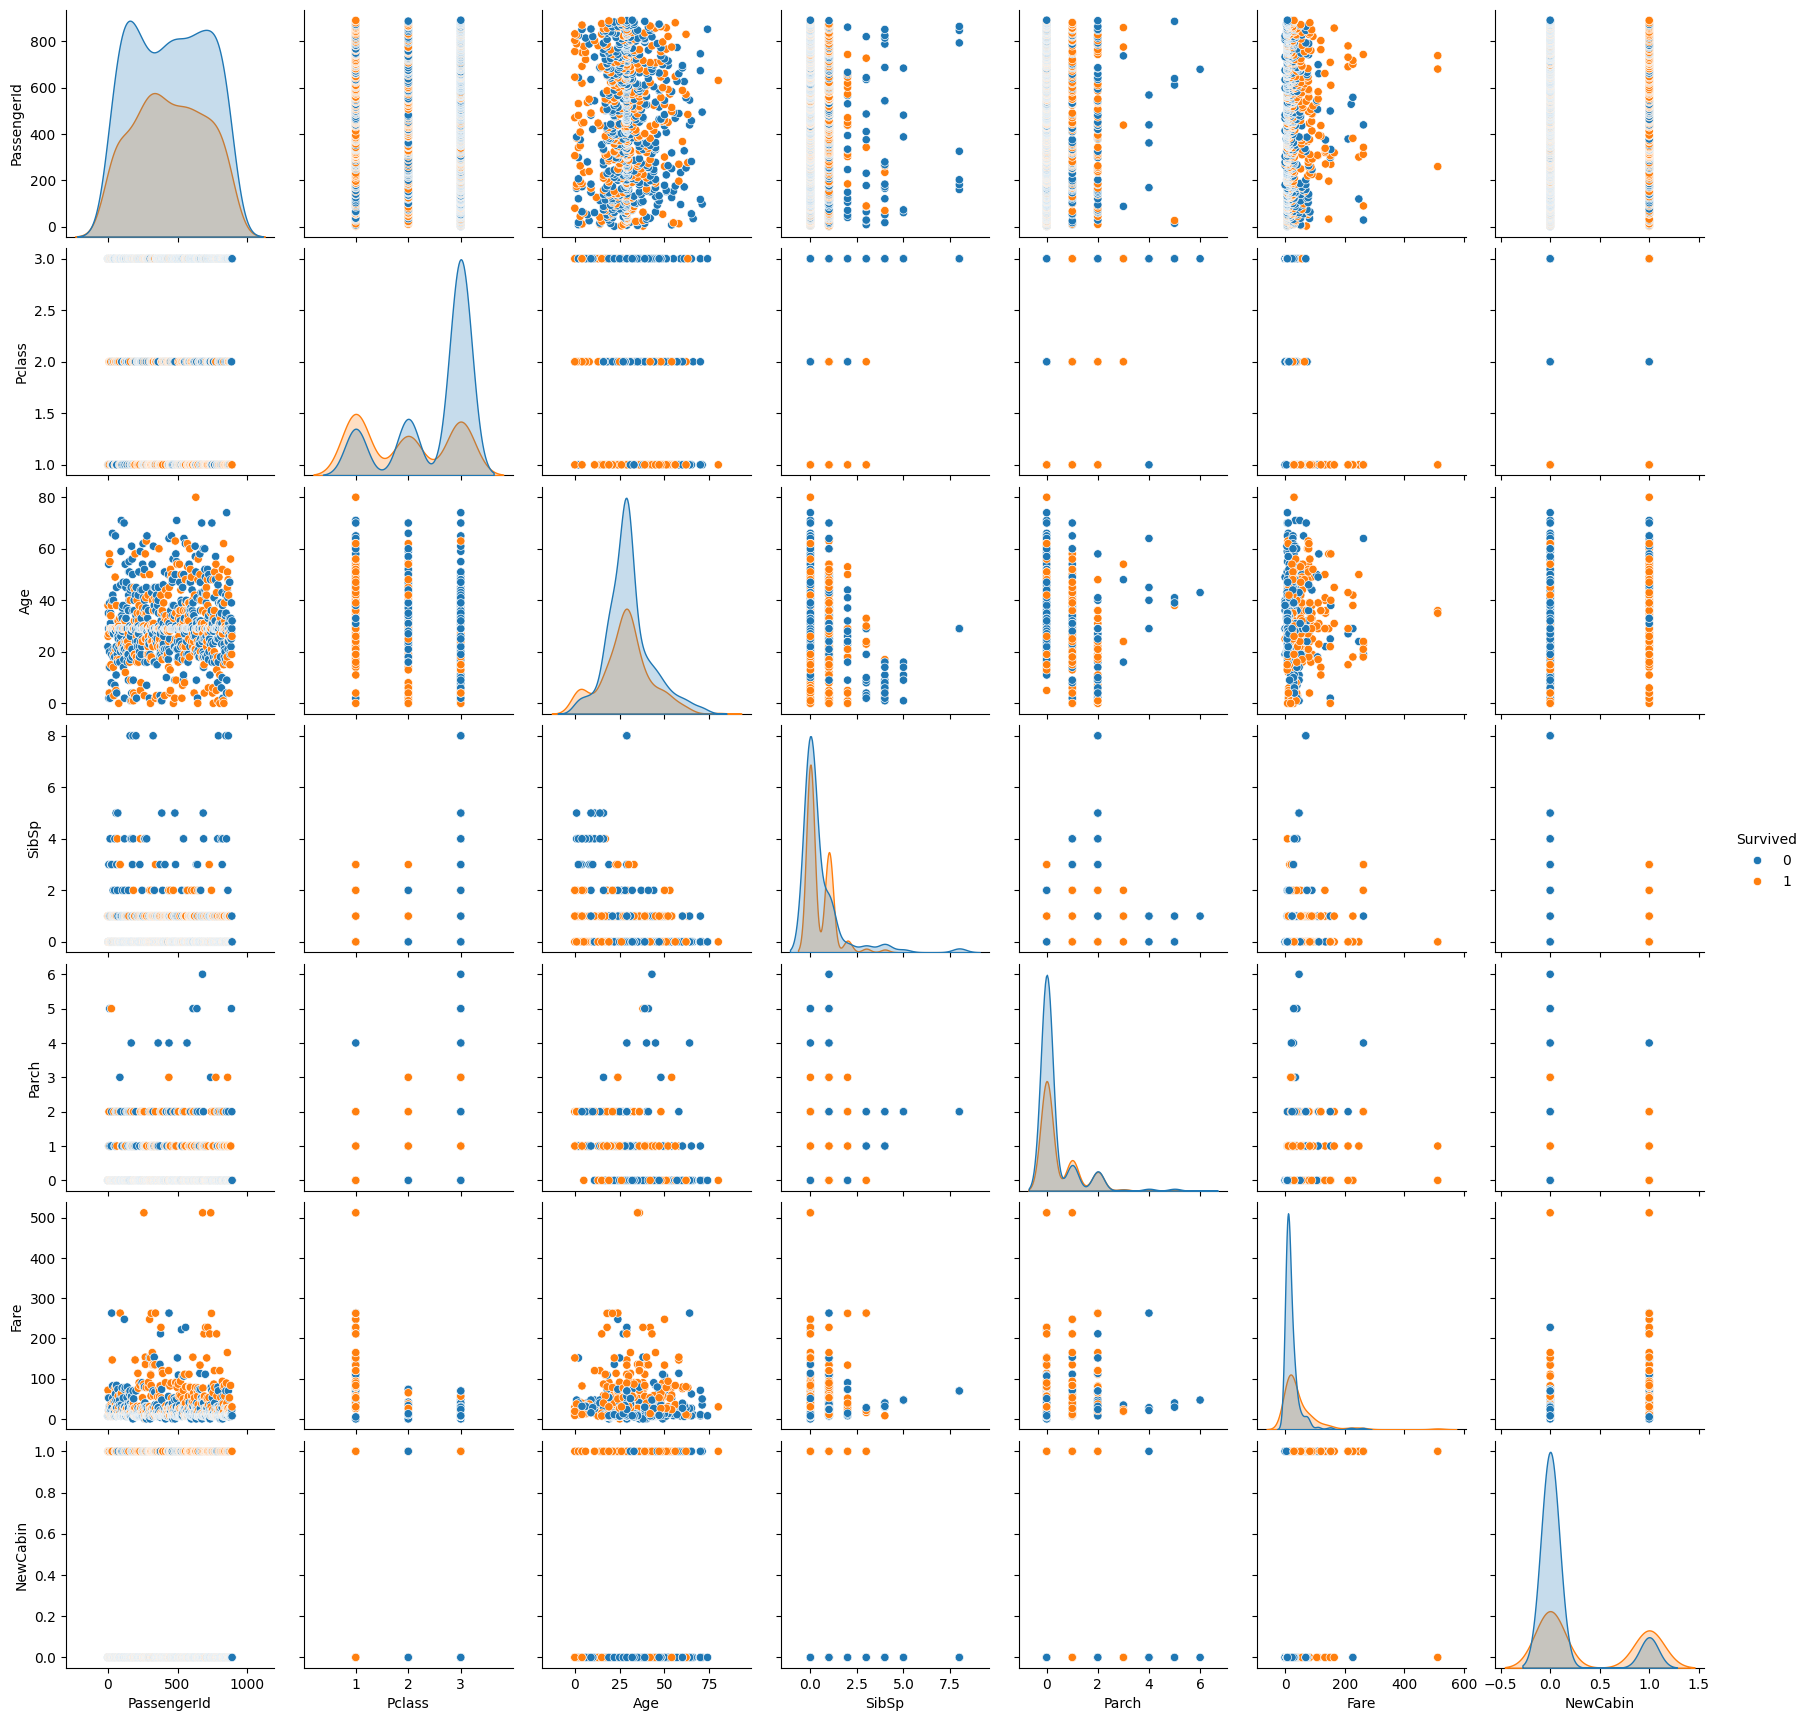

In [40]:
sns.pairplot(data=df,hue='Survived')

In [ ]:
import seaborn as sns
import pandas as pd

# Define a function to remove outliers for a specific gender
def remove_outliers(data, gender):
    if gender == 'male':
        gender_data = data[data['sex'] == 'male']
    elif gender == 'female':
        gender_data = data[data['sex'] == 'female']
    else:
        return data  # No gender specified, return original data
    
    q1 = gender_data['age'].quantile(0.25)
    q3 = gender_data['age'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    filtered_data = gender_data[(gender_data['age'] >= lower_bound) & (gender_data['age'] <= upper_bound)]
    return filtered_data

# Remove outliers for males and females
df_filtered = remove_outliers(df, 'male')
df_filtered = remove_outliers(df, 'female')

# Plot boxplot without outliers
sns.boxplot(data=df_filtered, x="sex", y="age", hue="survived")


<Axes: xlabel='Sex', ylabel='Age'>

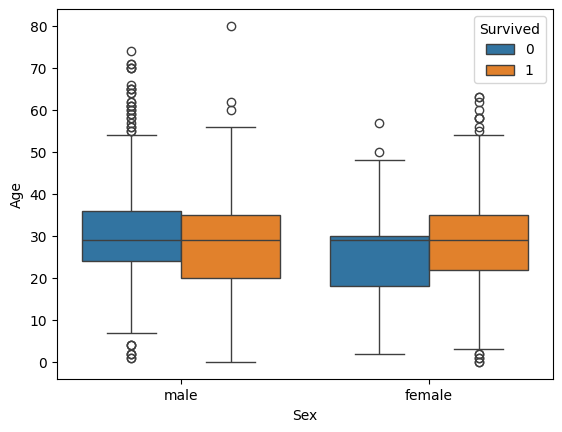

In [46]:
sns.boxplot(data=df,x="Sex",y="Age",hue="Survived")

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='Age'>

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


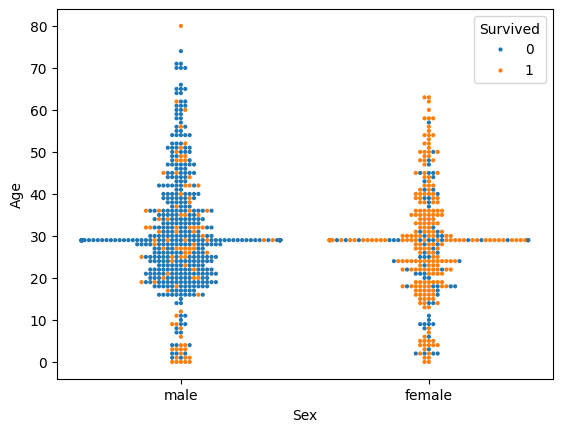

In [56]:
sns.swarmplot(data=df,x="Sex",y="Age",hue="Survived",size=3)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='Age'>

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


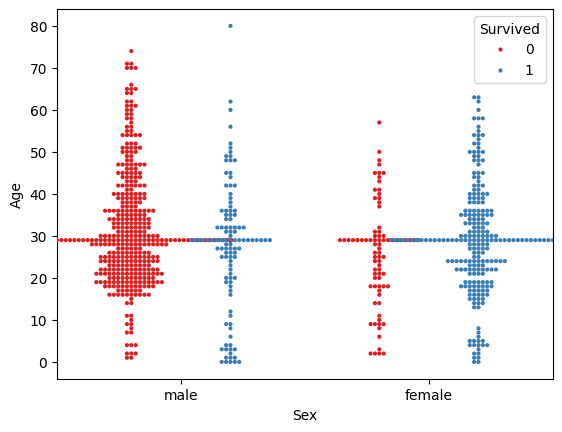

In [57]:
sns.swarmplot(data=df,x="Sex",y="Age",hue="Survived",dodge=True,palette='Set1',size=3)

<Axes: xlabel='Sex', ylabel='Age'>

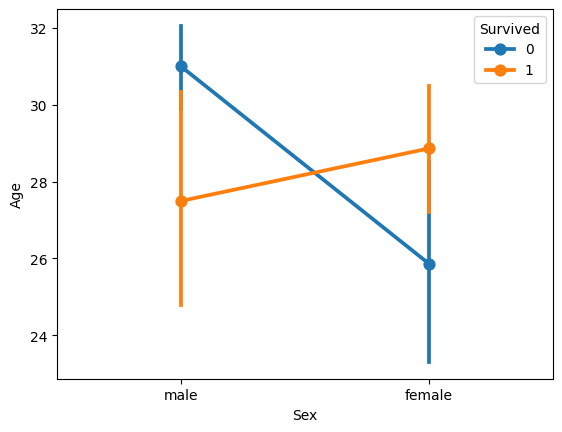

In [48]:
sns.pointplot(data=df,x="Sex",y="Age",hue="Survived")

<Axes: xlabel='Sex', ylabel='Age'>

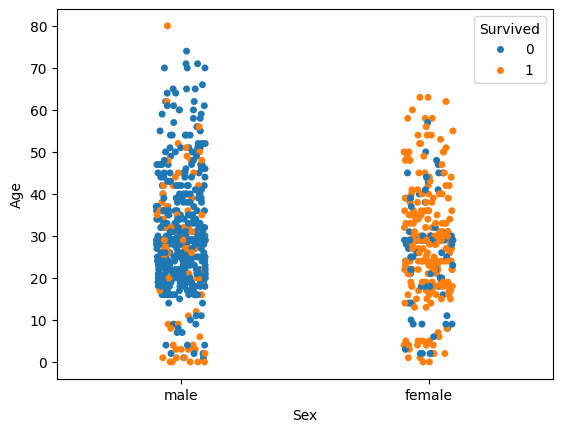

In [49]:
sns.stripplot(data=df,x="Sex",y="Age",hue="Survived")

<Axes: xlabel='Sex', ylabel='Age'>

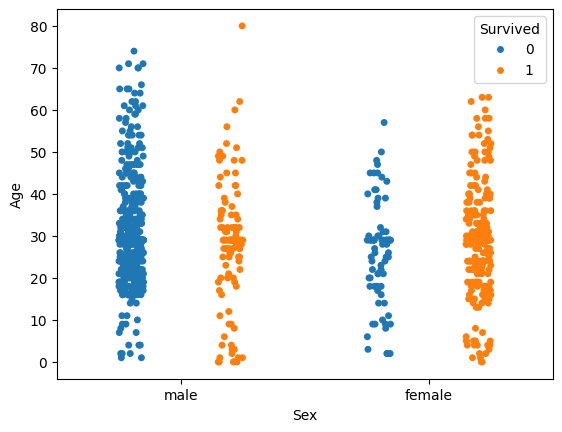

In [53]:
sns.stripplot(data=df,x="Sex",y="Age",hue="Survived",dodge=True)

<Axes: xlabel='Sex', ylabel='Age'>

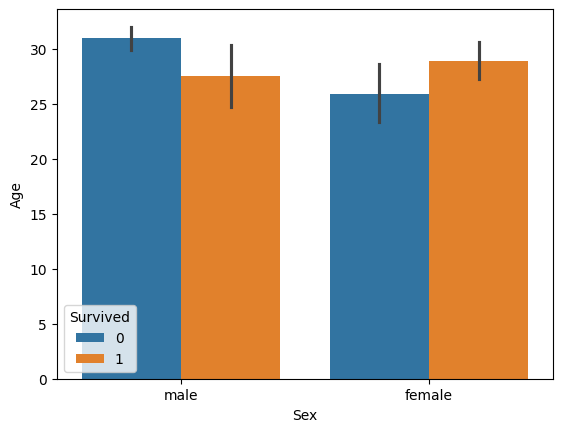

In [50]:
sns.barplot(data=df,x="Sex",y="Age",hue="Survived")

<Axes: xlabel='Sex', ylabel='Age'>

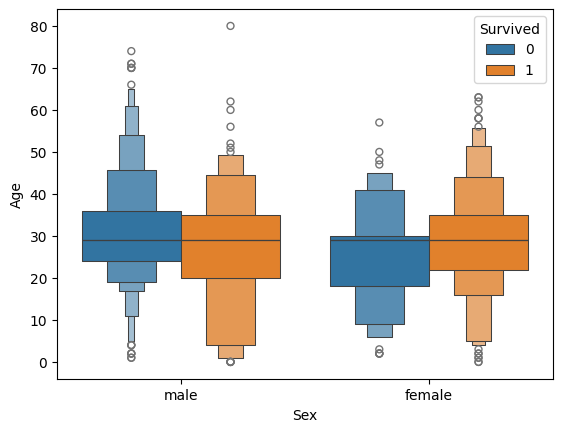

In [52]:
sns.boxenplot(data=df,x="Sex",y="Age",hue="Survived")